# Example – predicting medical expenses using linear regression

In [2]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

# Step 1 – collecting data

In [4]:
#predicting medical expenses using linear regression
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US
df = pd.read_csv('10 insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


# Step 2 – exploring and preparing the data

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

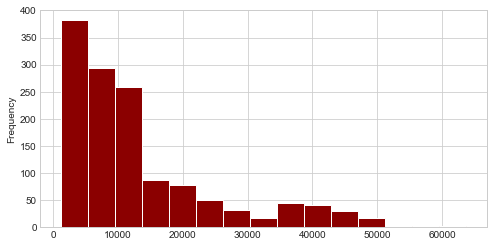

In [7]:
#Because the mean value is greater than the median, this implies that the distribution of insurance expenses is right-skewed
df['charges'].plot.hist(bins=15,color='darkred',edgecolor='white',figsize=(8,4))
df['charges'].describe()

In [8]:
#Exploring relationships among features – the correlation matrix
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


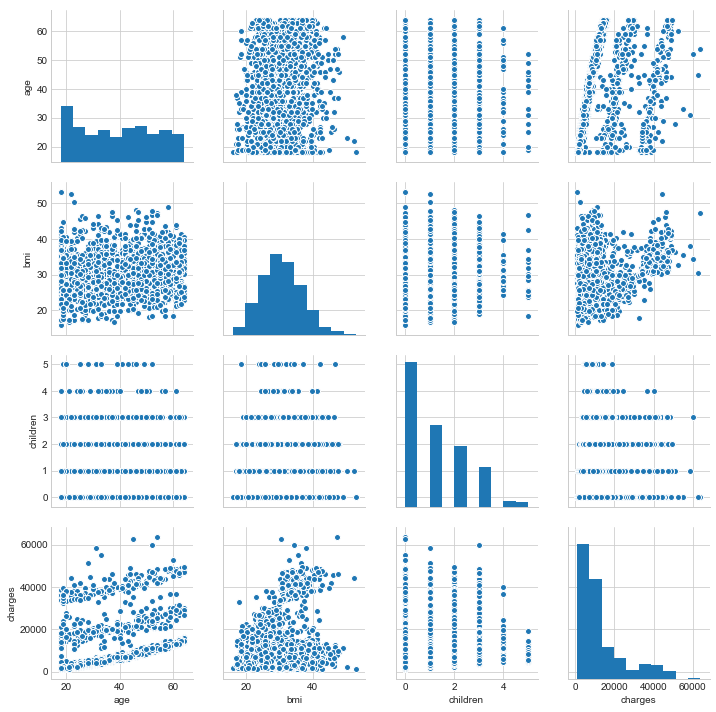

In [12]:
#Visualizing relationships among features – the scatterplot matrix
temp = df[['age', 'bmi', 'children', 'charges']]
sns.pairplot(temp,palette='inferno')

# Step 3 – training a model on the data

In [14]:
temp = df.drop('charges',axis=1).copy()
cat_feats = ['sex','smoker','region']
x_train = pd.get_dummies(temp,columns=cat_feats,drop_first=True)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age                 1338 non-null int64
bmi                 1338 non-null float64
children            1338 non-null int64
sex_male            1338 non-null uint8
smoker_yes          1338 non-null uint8
region_northwest    1338 non-null uint8
region_southeast    1338 non-null uint8
region_southwest    1338 non-null uint8
dtypes: float64(1), int64(2), uint8(5)
memory usage: 38.0 KB


In [16]:
y_train = df['charges'].copy()
x_train = sm.add_constant(x_train).copy()
lm_sm = sm.OLS(y_train, x_train)
est = lm_sm.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 07 Nov 2017   Prob (F-statistic):               0.00
Time:                        23:25:11   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819  

# Step 4 – evaluating model performance

In [18]:
y_pred = est.predict(x_train)
print('MAE:', sm.tools.eval_measures.meanabs(y_train, y_pred, axis=0))
print('MSE:', sm.tools.eval_measures.mse(y_train, y_pred, axis=0))
print ('RMSE:', sm.tools.eval_measures.rmse(y_train, y_pred, axis=0))

MAE: 4170.88689416
MSE: 36501893.0074
RMSE: 6041.67965117


# Step 5 – improving model performance

In [25]:
#Model specifcation – adding non-linear relationships
x_train['age2'] = x_train['age']**2

In [26]:
#Transformation – converting a numeric variable to a binary indicator
x_train['bmi30'] = x_train['bmi'].apply(lambda x: 1 if x >= 30 else 0)

In [34]:
lm_sm = sm.OLS(y_train, x_train)
est = lm_sm.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     416.2
Date:                Tue, 07 Nov 2017   Prob (F-statistic):               0.00
Time:                        23:41:14   Log-Likelihood:                -13528.
No. Observations:                1338   AIC:                         2.708e+04
Df Residuals:                    1327   BIC:                         2.713e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2943.1758   1828.115  